In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir = '/content/drive/MyDrive/OS Collected Data/sample/Training'
test_dir = '/content/drive/MyDrive/OS Collected Data/sample/Testing'

img_width, img_height = 227, 227

batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1557 images belonging to 3 classes.
Found 390 images belonging to 3 classes.


In [4]:
# AlexNet Model
alexnet_model = Sequential([
    Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(256, (5, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

alexnet_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
alexnet_history = alexnet_model.fit(
    train_generator,
    epochs=10,
    callbacks=[EarlyStopping(monitor='loss', patience=3)]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 492s 10s/step - accuracy: 0.4353 - loss: 1.7573
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 366s 7s/step - accuracy: 0.4221 - loss: 1.0445
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 360s 7s/step - accuracy: 0.4838 - loss: 0.9212
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 359s 7s/step - accuracy: 0.5196 - loss: 0.8726
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 354s 7s/step - accuracy: 0.5291 - loss: 0.8764
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 357s 7s/step - accuracy: 0.5697 - loss: 0.8321
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 351s 7s/step - accuracy: 0.5669 - loss: 0.8396
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 364s 7s/step - accuracy: 0.5951 - loss: 0.8135
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 344s 7s/step - accuracy: 0.5951 - loss: 0.8114
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 353s 7s/step - accuracy: 0.6352 - loss: 0.7873


In [6]:
test_loss, test_acc = alexnet_model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 97s 7s/step - accuracy: 0.6050 - loss: 0.7380
Test accuracy: 0.5846154093742371


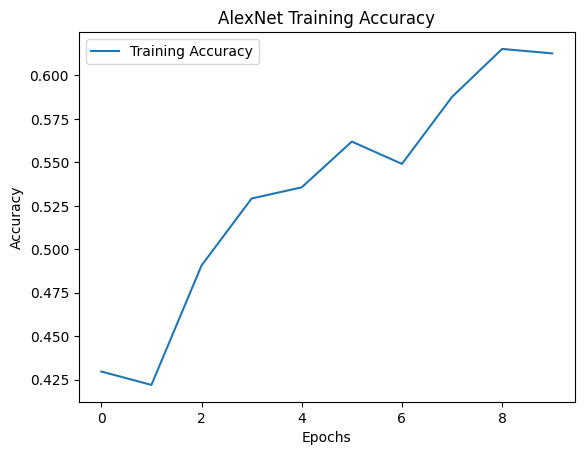

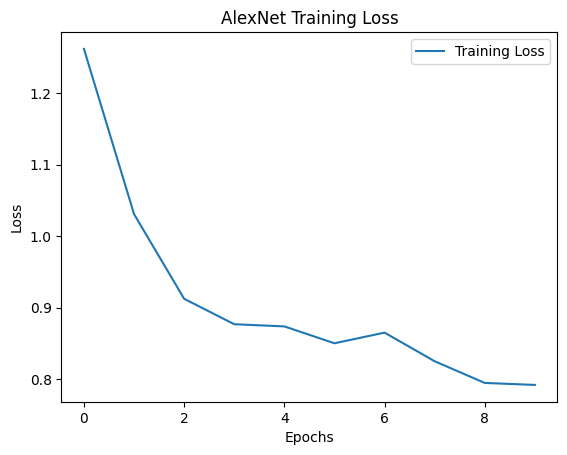

In [7]:
# Plot AlexNet history
def plot_alexnet_history(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('AlexNet Training Accuracy')
    plt.show()

    plt.plot(history.history['loss'], label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('AlexNet Training Loss')
    plt.show()

plot_alexnet_history(alexnet_history)

13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step
Confusion Matrix:
 [[79 19 58]
 [37  7 31]
 [81 19 59]]


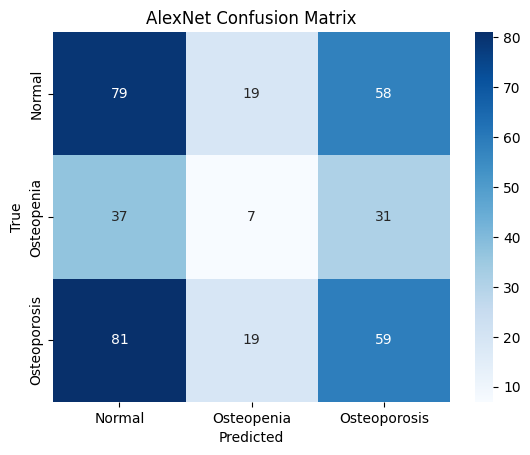

AlexNet F1 Score: 0.3581753054381802


In [8]:
# Predictions
alexnet_predictions = alexnet_model.predict(test_generator)
alexnet_pred_labels = np.argmax(alexnet_predictions, axis=1)
alexnet_true_labels = test_generator.classes

# Confusion Matrix
conf_matrix = confusion_matrix(alexnet_true_labels, alexnet_pred_labels)
print("Confusion Matrix:\n", conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.title('AlexNet Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

alexnet_f1_score = f1_score(alexnet_true_labels, alexnet_pred_labels, average='weighted')
print(f"AlexNet F1 Score: {alexnet_f1_score}")